In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./EF_comp.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 83 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Project number                                198 non-null    object 
 1   The date                                      198 non-null    object 
 2   Region                                        198 non-null    object 
 3   The town/village                              191 non-null    object 
 4   Home address                                  198 non-null    object 
 5   County/City                                   198 non-null    object 
 6   Initial year of exploitation                  198 non-null    int64  
 7   Building Total Area                           198 non-null    float64
 8   Room volume                                   198 non-null    float64
 9   Average floor height                          198 non-null    flo

In [12]:
feature_cols = ['Building Total Area','Reference area','Above-ground floors',
                'Underground floor','Energy consumption before',
                'Initial energy class ','Energy class after']
target_cols = ['Carrying out construction works ','Reconstruction of engineering systems',
                'Heat installation','Water heating system']

categorical_cols = ['Above-ground floors','Underground floor',
                    'Carrying out construction works',
                    'Reconstruction of engineering systems',
                    'Heat installation','Water heating system']

df = df[df.columns[df.columns.isin(feature_cols+target_cols)]]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Building Total Area                    198 non-null    float64
 1   Reference area                         198 non-null    float64
 2   Above-ground floors                    198 non-null    int64  
 3   Underground floor                      198 non-null    int64  
 4   Initial energy class                   198 non-null    object 
 5   Energy consumption before              198 non-null    float64
 6   Carrying out construction works        198 non-null    int64  
 7   Reconstruction of engineering systems  198 non-null    int64  
 8   Water heating system                   198 non-null    int64  
 9   Heat installation                      198 non-null    int64  
 10  Energy class after                     198 non-null    object 
dtypes: flo

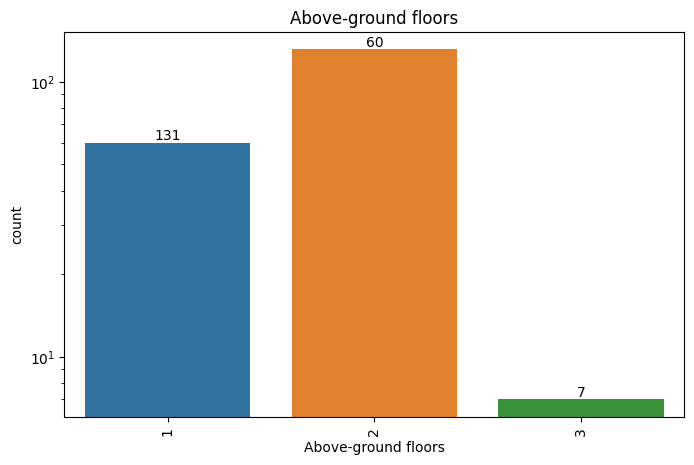

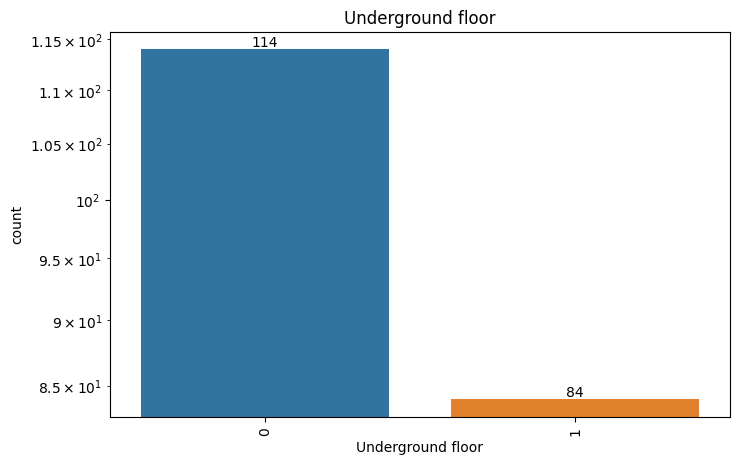

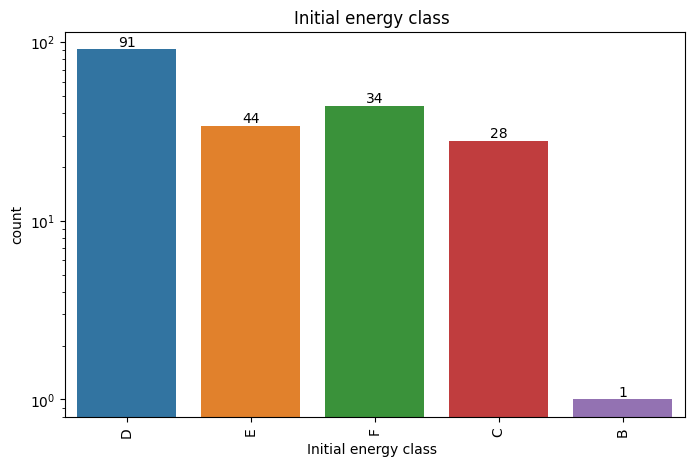

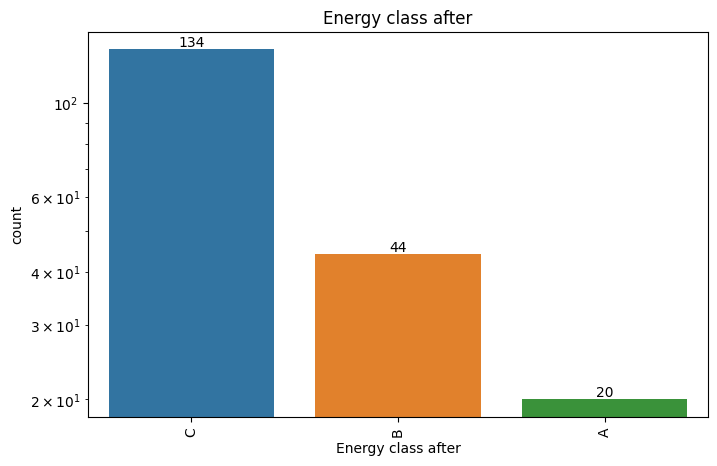

In [18]:
def create_barplots():
    for col in ['Above-ground floors','Underground floor','Initial energy class ','Energy class after']:
        """ 
        This function creates a countplot for each of datetime_parameters we want in the x-axis
        Parameters: None
        ----------
        Returns: None
        -------
        """
        fig, ax = plt.subplots()
        fig.set_size_inches(8, 5)
        ax = sns.countplot(x=df[col])
        ax.set_yscale('log')
        abs_values = df[col].value_counts(ascending=False).values

        ax.bar_label(ax.containers[0], labels=abs_values,rotation=0)
        plt.title(col)
        plt.xticks(x=abs_values, rotation=90)
        plt.show()

create_barplots()

Columns left: 83
Columns left: 79


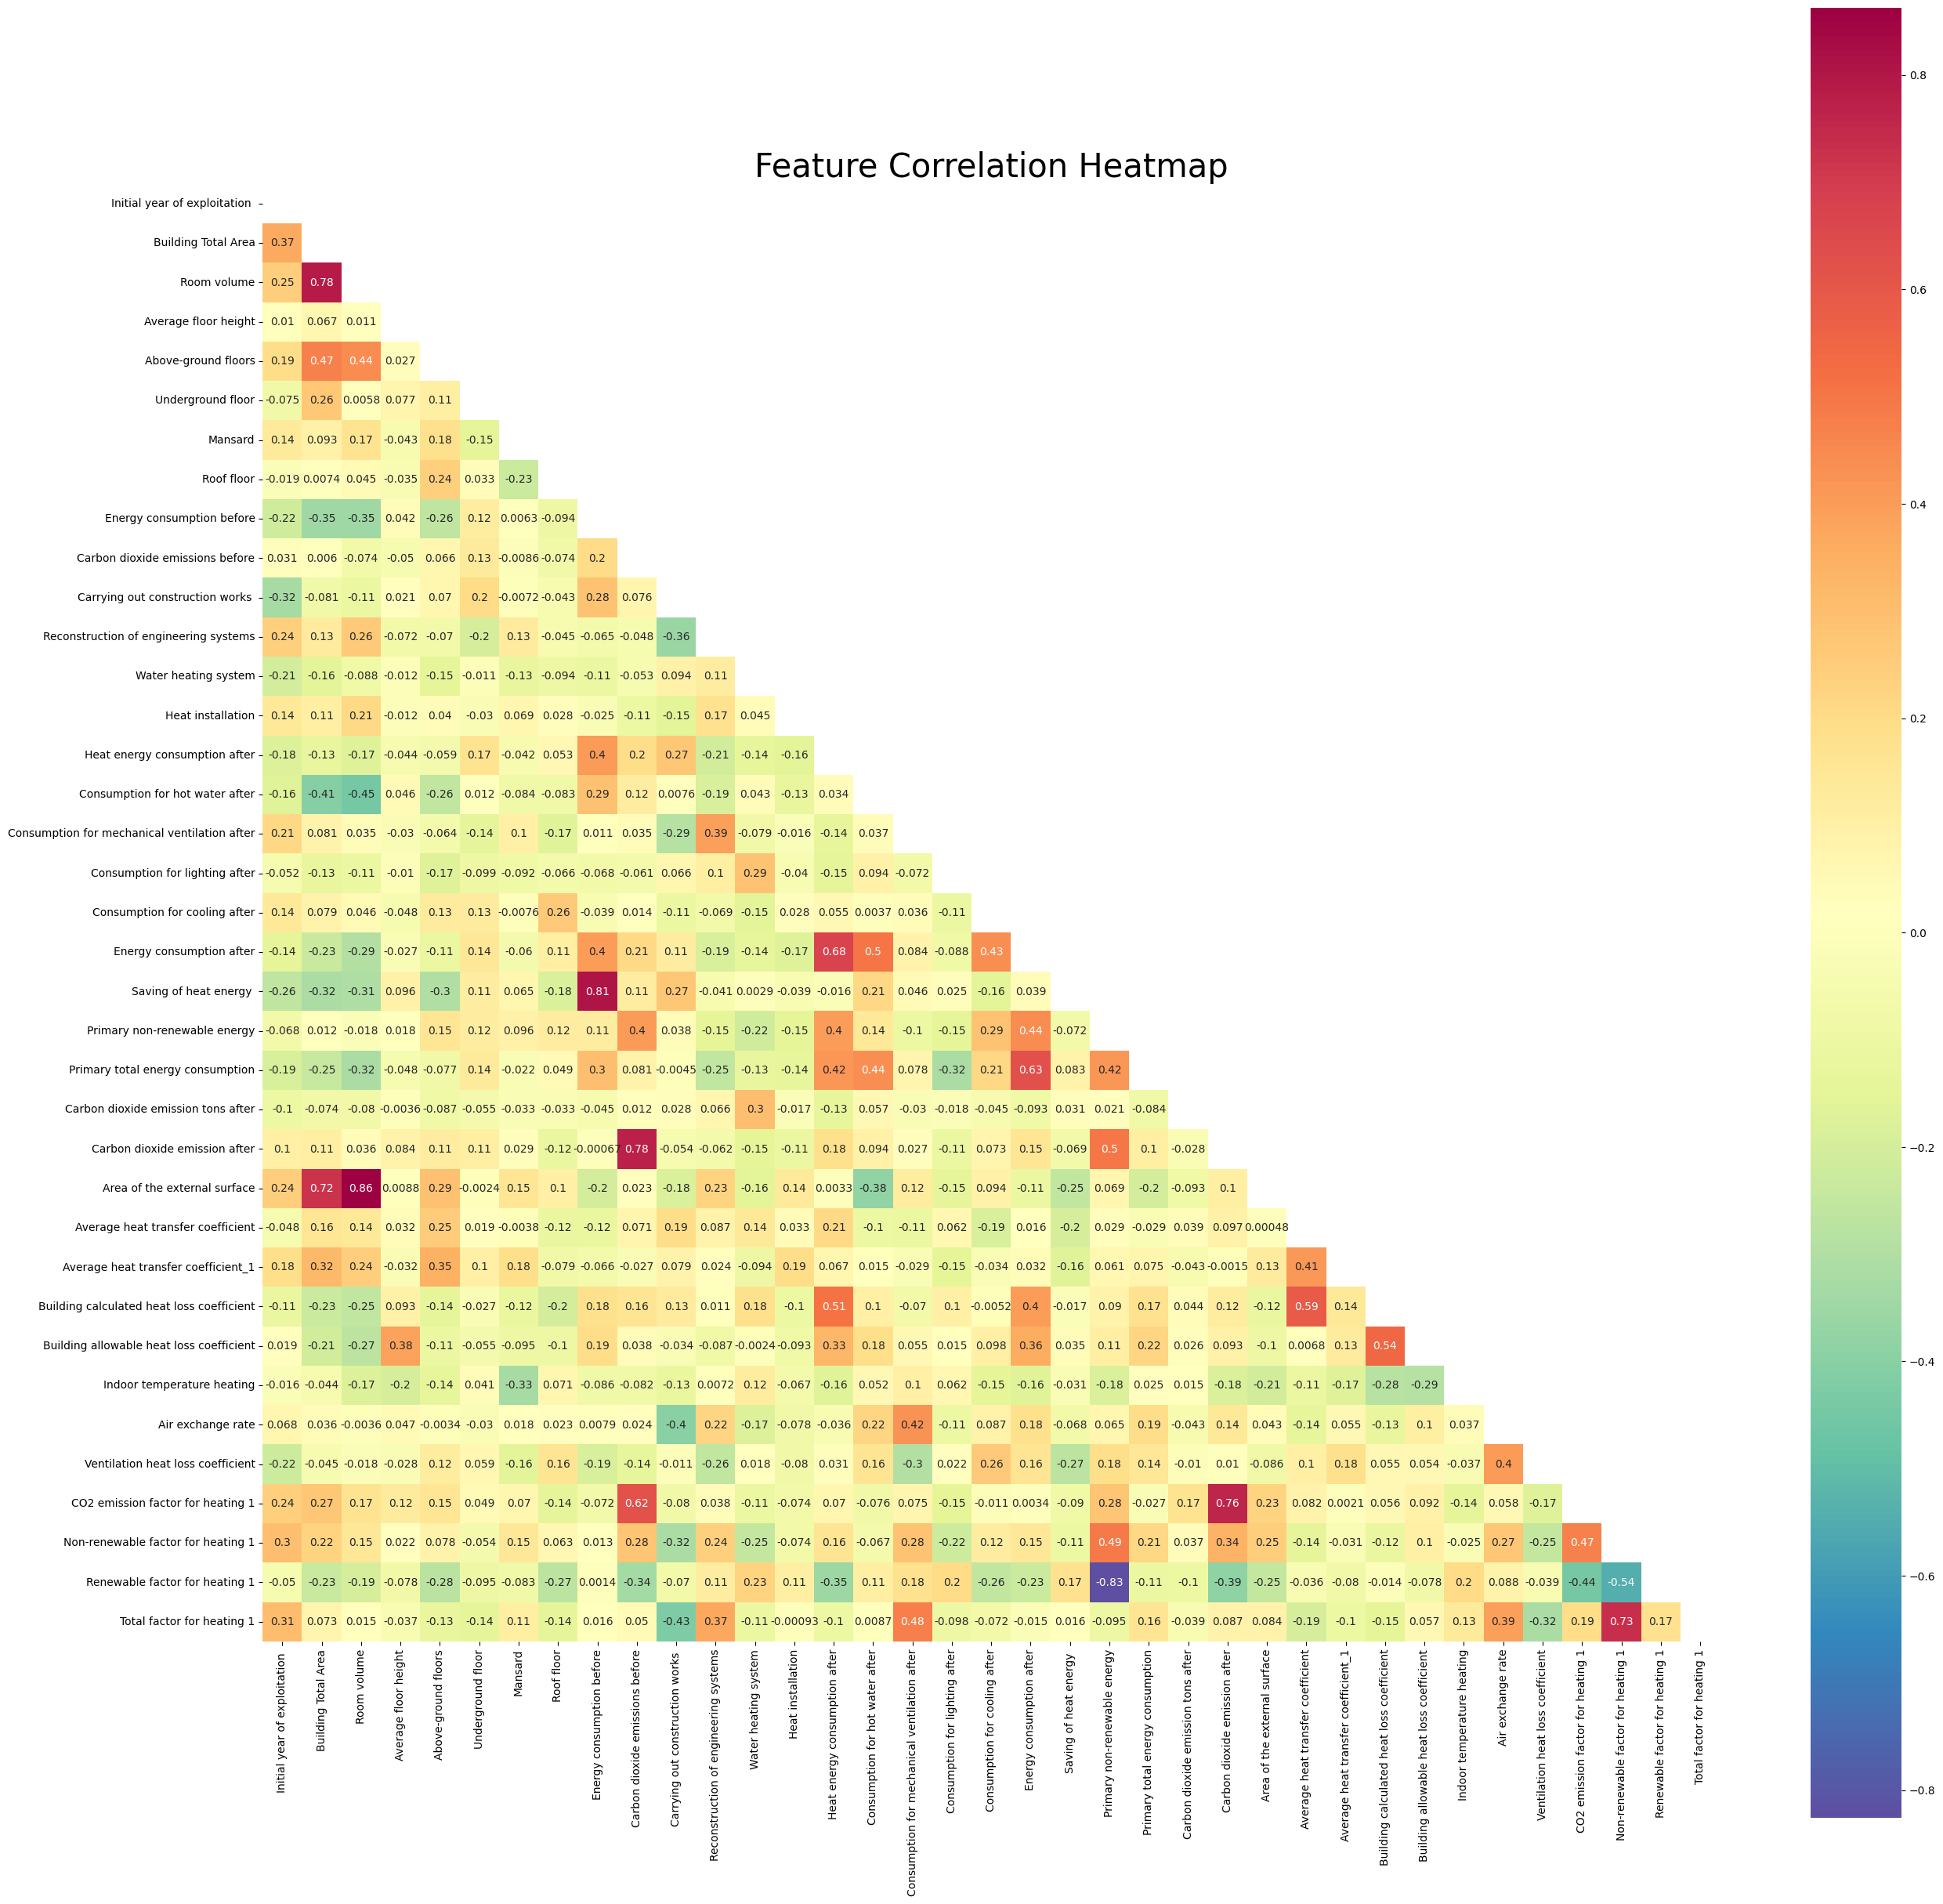

In [21]:
def corr_heatmap(dframe):
    """
    Creates correlation map of dframe between different countries 
    Parameters: 
        dframe: pandas.dataframe of our dataset
        cluster_labels: (optionally) list of labels from hierarchical clustering (see create_dendrogram() below)
    ----------
    Returns: None
    -------
    """
    print(f'Columns left: {len(dframe.columns)}')

    # Set the threshold for high correlation
    threshold = 0.9
    # Create correlation matrix
    corr_matrix = dframe.corr().abs()
    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    # Find features with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    # Drop features 
    dframe.drop(to_drop, axis=1, inplace=True)

    print(f'Columns left: {len(dframe.columns)}')
    # Compute the correlation matrix (excluding NA/null values)
    corr = dframe.corr()    
    cmap = 'Spectral_r'
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(30, 30))

    # Draw the heatmap with the mask and correct aspect ratio
    res = sns.heatmap(corr, mask=mask, cmap=cmap, square=True, annot=True, ax=ax)

    ax.set_title('Feature Correlation Heatmap',fontsize = 30)

temp_df = df.copy()
corr_heatmap(temp_df)
plt.show()

In [21]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
import sweetviz as sv
analyze_report = sv.analyze(df)
analyze_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
